In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import nltk

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
df = pd.read_csv("SMSSpamCollection", sep="\t", header=None)
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.columns = ['label', 'msg'] # add column name
df.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['msg_len'] = df['msg'].apply(lambda x: len(x))
df.head()

,label,msg,msg_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
import string
def punctuation_count(txt):
    count = sum([1 for i in txt if i in string.punctuation])
    return count
df['punctuation'] = df['msg'].apply(lambda x:punctuation_count(x))
df.head()

,label,msg,msg_len,punctuation
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [8]:
df.isnull().sum()

label          0
msg            0
msg_len        0
punctuation    0
dtype: int64

In [9]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Balance data set

In [10]:
ham = df[df['label']=='ham']
ham.head()

,label,msg,msg_len,punctuation
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [11]:
spam = df[df['label']=='spam']
spam.head()

,label,msg,msg_len,punctuation
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [12]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [13]:
ham = ham.sample(spam.shape[0])

In [14]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [15]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,msg,msg_len,punctuation
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


In [16]:
data.shape

(1494, 4)

## Explodary data analysis

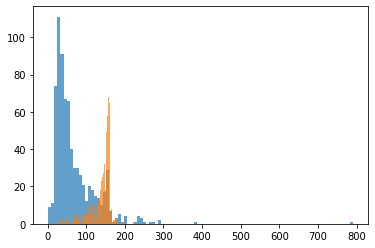

In [17]:
plt.hist(data[data['label']=='ham']['msg_len'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['msg_len'], bins = 100, alpha = 0.7)

plt.show()

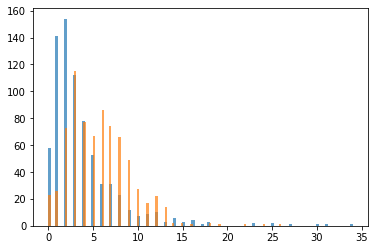

In [18]:
plt.hist(data[data['label']=='ham']['punctuation'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punctuation'], bins = 100, alpha = 0.7)

plt.show()

# Data preparation

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
data.head()

,label,msg,msg_len,punctuation
0,ham,"It'll be tough, but I'll do what I have to",42,3
1,ham,"Ooh, 4got, i'm gonna start belly dancing in mo...",105,6
2,ham,"Yeah, probably earlier than that",32,1
3,ham,Can you talk with me..,22,2
4,ham,Aiyo cos i sms ü then ü neva reply so i wait 4...,96,2


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data['msg'], data['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=data['label'])

In [23]:
# Pipeline:

In [24]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [25]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [26]:
y_pred = clf.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred)

array([[222,   3],
       [ 23, 201]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.94       225
        spam       0.99      0.90      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [29]:
accuracy_score(y_test, y_pred)

0.9420935412026726

In [30]:
clf.predict(["Hi, How are you?"])

array(['ham'], dtype=object)

In [31]:
clf.predict(["Congratulation ... You have won flight ticket for Dubai"])

array(['ham'], dtype=object)

In [32]:
# SVM

In [33]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])

In [34]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fun

In [35]:
y_pred = clf.predict(X_test)

In [36]:
confusion_matrix(y_test, y_pred)

array([[220,   5],
       [ 16, 208]], dtype=int64)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.98      0.95       225
        spam       0.98      0.93      0.95       224

    accuracy                           0.95       449
   macro avg       0.95      0.95      0.95       449
weighted avg       0.95      0.95      0.95       449



In [38]:
accuracy_score(y_test, y_pred)

0.9532293986636972

In [39]:
clf.predict(["Hi, How are you?"])

array(['ham'], dtype=object)

In [40]:
clf.predict(["You have won flight ticket for Dubai"])

array(['spam'], dtype=object)

# Data Preparation for model deploy

In [41]:
data.head()

,label,msg,msg_len,punctuation
0,ham,"It'll be tough, but I'll do what I have to",42,3
1,ham,"Ooh, 4got, i'm gonna start belly dancing in mo...",105,6
2,ham,"Yeah, probably earlier than that",32,1
3,ham,Can you talk with me..,22,2
4,ham,Aiyo cos i sms ü then ü neva reply so i wait 4...,96,2


In [42]:
data1 = data[['label', 'msg']]

In [43]:
data1.head()

,label,msg
0,ham,"It'll be tough, but I'll do what I have to"
1,ham,"Ooh, 4got, i'm gonna start belly dancing in mo..."
2,ham,"Yeah, probably earlier than that"
3,ham,Can you talk with me..
4,ham,Aiyo cos i sms ü then ü neva reply so i wait 4...


In [44]:
X = data1["msg"]
y = data1["label"]

In [45]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [46]:
import pickle
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
classifier = SVC(C = 1000, gamma = 'auto')

In [49]:
classifier.fit(X_train, y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
y_pred = classifier.predict(X_test)

In [51]:
confusion_matrix(y_test, y_pred)

array([[150,   1],
       [  7, 141]], dtype=int64)

In [52]:
pickle.dump(clf, open('classifier.pkl', 'wb'))